# Unsupervised Learning

Most of the applications of machine learning today are based on supervised learning, that is where we have labelled data. However the vast majority of data is unlabelled, that is will have input features $X$, but we do not have the input labels $y$. In cases like this we use unsupervised learning. Unsupervised learning has a very large potential and we are just beginning to learn about its applications. 

Lets look at an example of why we need unsupervised learning. Lets say we have a manufacturing production line and we wish to decide which items are defective. Now we can fairly easily create a system that will take picture of the items every day. We will be able to build a reasonably large dataset very quickly. However the data will not be labelled. To make it a supervised learning problem we will need workers to manually go through and label the data, this can end up being a long, costly and tedious task and so it will usually only be done for a small subset of the data, and as a result due to less training instances the classifiers performance will be dissapointing. Also whenever the company creates a new product or changes existing products we will have to start the whole process from scratch.

Unsupervised learning can be used to solve this problem. The algorithm will be able to exploit the unlabelled data without needing the humans to kabel every picture. it would also be able to classify whether an item is defective or not. We will look into this process in this chapter.

Earlier we did dimensionality reduction, which is one of the most common unsupervised learning tasks. We will look at some other tasks as well such as: -

1. Clustering: the goal is to group similar instances together into **clusters**. CLustering is a great tool for data analysis, customer segmentation, recommendation systems, search engines, semi-supervised learning, dimensionality reduction, and more.

2. Anomaly detection - the objective in this case is to figure out what normal data looks like and then use that to detect abnormal instances such as defective items on a production line or a new trend in a time series.

3. Density estimation - this is the task of estimating the **probability density function** (PDF) of the random process that generatd the dataset. Density estimation is commonly used for anomaly detection: instances located in very low density regions are likely to be anomalies. It is also useful for data analysis and visualisation.

This chapter will be divided into the following sections: -
1. Clustering
2. Gaussian Mixtures

## 1. Clustering

Clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters).

To understand this lets look at an example. Lets say you are walking in the park and you see some flowers that you have never seen before, nearby you see other flowers that are similar but are not the same as te ones you saw before as a result you can infer from this information that both the flowers are of the same species or genus. While you may need an expert to tell you what the flowers are, you can definietly tell whether theyare similar or not and this does not require an expert. THis is the concept upon which clustering is built. We identify similar instances and and assign them to clusters or groups of similar instances, where the inter-cluster similarity is less than the intra-cluster similarity.(similarity of instances belonging to the same cluster is higher and similarity between instances belonging to different clusters is lower).

Just like in classification, each instance gets assigned to a group, however unlike classification, it is an unsupervised problem as a result the groups are not known beforehand. The algorithm will figure out the groups on its own. We can take an example of the iris dataset we used earlier, on the left we can see the seperation because of the labels. THe right one does not have access to the labels and so it has to figure out the groups on its own. Since it does not have access to the labels we cannot use a classification algorithm, this is where the clustering algorithm comes in. Most clustering algorithms will easily be able to detect the lower left clusters however on seeing the cluser in the upper right corener it might not be able to detect it as two seperate clusters. However the dataset has two addition features, sepal length and width, which are not represented here and clustering algorithms can made good use of all features, so in fact they identigy the three clusters fairly well (e.g. using a Gaussian mixture model, only 5 instances out of 150 are assigned to the wrong cluster). 

Clustering is used in a wide variety of applications such as: -

1. Customer segmentation: you can cluster you customer based on their purchases and their activity in the website. This is useful to understand who your customer sare and what thet need, so you can adapt yoyr products and marketing campaigns to each segment. For example, customer segmentation can be useful in recommender sustems to suggest content that other users in the same cluster enjoyed.

2. Data Analysis: when you analyse a new dataset, it can be useful to run a clutering algorithm and then alayse each cluster seperately. This can help you gain some insights on the dataset. For example, you can use clustering to detect the main topics discussed in a collection of newsgroups posts, or to find similar groups of customers.

3. Dimensionality Reduction: once a dataset has been clustered it is possible to measure each instances **affinity** with each cluster (affinity is a measure of how well an instance fits into a cluster). Each instances feature vector $x$ can then be replaed with a vector of its cluster affinities. If there are $k$ clusters then this vector is $k$-dimensional. This vector is typically of much lower-dimensional than the original feature vector, but it can preserve enough information for further processing. This is called **feature vector compression**. For example, you can use clustering for dimensionality reduction, then feed the resulting vectors to a linear classifier such as a logistic regression classifier.

4. Anomaly Detection (Outlier Detecion): any instance that has a low affinity to all the clusters is likely to be an anomaly. FOr example if you have clustere the users on your wesbite based on their behavious, such as an unusual number of requests per second. Anomaly detection is typically useful for fraud detection, for example, you can use it to detect credit card fraud.

5. Semi-Supervised Learning: if you have only a few instances with labels but a very large dataset, then you could perform clustering and propogate those labels to all the instances in the same clusters. This technique can greatly increase the amount of labelled data available for training, which in turn will lead to an increased performance of the subsequent supervised learning algorithms.

6. Search Engines: some search engines let you search for images similar to a reference image. To build such a system you would first have to appy a clustering algorithm to all the images in your database; similar images would end up in the same cluster. Then when a user provides a reference image, we can find similar images by finding the cluster this image would belong to and then simply return all images from that cluster.

7. Image Segmentation:by clustering pixels according to their color then replacing each pixels color it is possible to find the mean color o its cluster, it is hence possible to considerably reduce the number of colors in the image. Image segmentation is used in many object detection and tracking system as it makes it easier to detect the contour of ech object.

There is no universal definition of what a cluster is: it really depends on the context and different algorithms will cpature different kinds of clusters, some algorithms look for instances centered around a particular point called a **centroid**. Others look for continous regions of densely packed instances: these clusters can take on any shape. SOme algorithms are hierarchal, looking for clusters of clusters.

In this section we will look at the two most popular clustering algorithms, K-Means and DBSCAN, we will explore some of their applications such as nonlinear dimensionality reduction, semi-supervised learning, and anomaly detection.

### 1.1 K-Means

Lets say we consider an unlabeled dataset given below in the diagram. We can clearly see that there are five blobs os instances. The K-Means algorithm is a simple algorithm capable of clustering this type of data very efficiently and quickly, often in just a few iterations. Lets train the algorithm on this dataset. It will try to find each blobs center and assign each instance to the closest blob.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [6]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=[0.5, 0.5, 0.5, 1, 1], random_state=42)

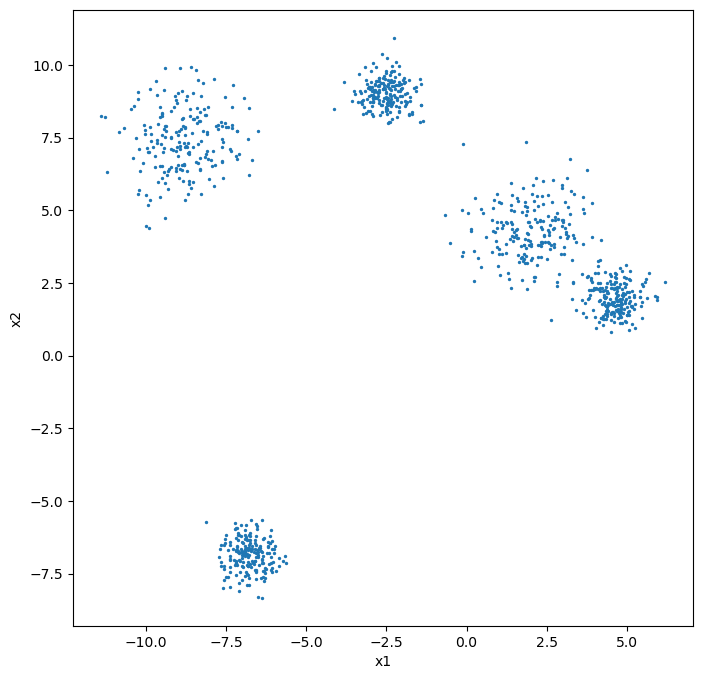

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Lets now train our K-means algorithm on this dataset.

In [8]:
from sklearn.cluster import KMeans

In [10]:
k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

Note that you have to specify the number of clusters $k$ that the algorithm must find. In this example, it is pretty obvious from looking at the data that $k = 5$. However in general it is not that easy. We will look into the process to choose the right number of clusters later.

Each instance was assigned to one of the five clusters. In the context of clustering an instance's **label** is the index of the cluster that the instance gets assigned to by the algorihtm. THis is not to be confused with the class labels in classification (remember that clustering is an unsupervised learning task).  The KMeans instance preserves a copy of the labels of the instances it was trained on, available via the labels_ instance variable. The labels_ variable contains the index of the cluster that each instance was assigned to. For example, the first instance was assigned to cluster 1, the second instance was assigned to cluster 4, and so on. The KMeans instance also preserves the location of the centroids of each cluster, available via the cluster_centers_ variable. The cluster_centers_ variable contains the location of the centroid of each cluster. For example, the centroid of cluster 0 is located at [-0.6, 2.8], the centroid of cluster 1 is located at [0.1, 4.2], and so on.

In [12]:
y_pred[:5]

array([0, 0, 2, 0, 4], dtype=int32)

In [17]:
y_pred is kmeans.labels_

True

Remember we have used fit predict that is we have trained and predicted on X.

In [18]:
kmeans.cluster_centers_

array([[ 4.57925901,  1.98967321],
       [-2.50804399,  9.02008423],
       [-6.78296705, -6.84575207],
       [-8.82326814,  7.40132883],
       [ 1.95897075,  4.33065786]])

We can easily assign new instances to the cluster whose centeroid is closest to the instance. This is called **hard clustering**. However, we can also measure the distance between each instance and the centroid of each cluster. This is called **soft clustering**. The KMeans class uses hard clustering by default, but if you set the **n_init** hyperparameter to a value greater than 1 (e.g., 10), then it will run the algorithm 10 times with different random initializations and keep the best solution. This is called **k-means++**. The k-means++ algorithm is a variant of the k-means algorithm that tries to select the initial centroids to be as far apart from each other as possible. This generally leads to a better solution.

Hard clustering is method to grouping the data items such that each item is only assigned to one cluster, K-Means is one of them. While Soft clustering is method to grouping the data items such that an item can exist in multiple clusters, Fuzzy C-Means (FCM) is an example. That is in hard clustering instances belong to a **single cluster** while in soft clustering instance may belong to several clusters with **varying degrees** of membership in each.

Lets now assign new instances in the cluster to whose centroid is the closest.

In [19]:
import numpy as np

In [20]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 0, 4, 4], dtype=int32)

Lets now plot the decision boundaries

In [21]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [22]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

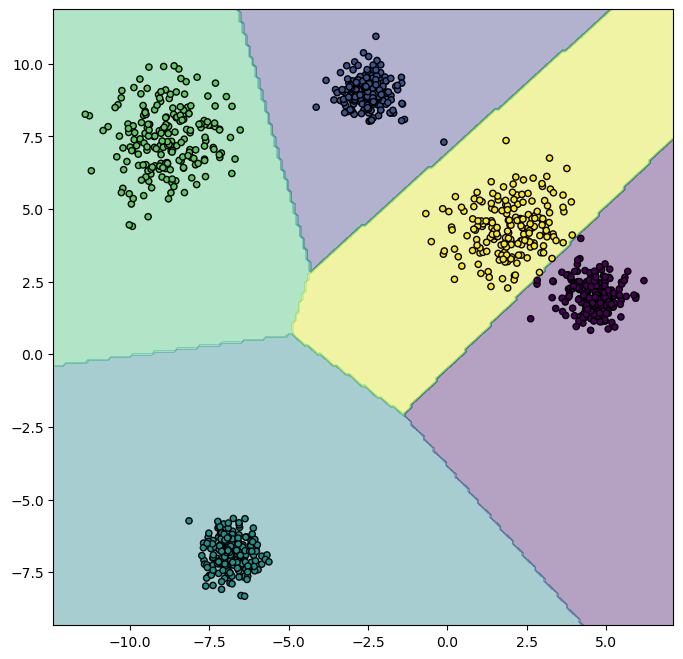

In [23]:
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
plt.show()

All KMeans cares about is the distance between instances and the centroids. Instead of assigning each instance to a cluster (hard clustering) it's better to give a per-instance cluster score (soft clustering). The score can be the distance between the instance and the centroids (this can also be a good dimensionality reduction technique).

In sklearn, the transform method measures the distance between each instance and the centroids.

In [24]:
kmeans.transform(X_new)

array([[ 4.57927065,  7.45465407, 11.14701627, 10.34526045,  3.04459069],
       [ 1.57929277,  8.92301133, 13.18915365, 12.99861618,  2.55258849],
       [ 7.64630154,  6.04015189, 10.54749608,  7.29946213,  5.13439784],
       [ 7.59642024,  6.53861752, 10.08235694,  7.61140435,  5.28608542]])

In the example given above the first instance is 4.57 from the first centroid, 7.45 from the second and so on. If you have a high dimensional dataset and you transform it this way you end up with a $k$-dimensional dataset: this transformation can be very effficient non linear dimensionality reduction technique.

### 1.1.1 K-Means Algorithm

So how does the K-Means algorithm work? If you were given the centroids, then you could easily assign labels to the instances based on which centroid is closest to them, if however you were given the labels instead you could find the centroid as the mean of instances with those labels. However in this scenario we neither have the centroids nor the labels so how do we find them? 

First we assign centroids, the number of centroids is equal to the number of clusters. We then randomly initialise the value of the centroids. After we do this we have positions for all the centroids, we use these then to label the instances (closest to centroid). We then update the centroids by taking the mean of all the instances assigned to that centroid. We then repeat this process until the centroids stop moving (that is their position updates are very small). The algorithm is guaranteed to converge in a finite number of steps (this is because the mean squared distance between instances and their closest centroid can only go down at each step), but it may converge to a local optimum, not the global optimum (this is because the algorithm is very sensitive to the initial values chosen for the centroids).

The computational complexity of the algorithm is $O(kmn)$ where $m$ is the number of instances, $n$ is the number of features, and $k$ is the number of clusters. This is a linear complexity in the number of instances and features, but it is quadratic in the number of clusters. This means that the algorithm will not scale well if you have a large number of clusters. However, it is very fast when the number of clusters is small (e.g., 10 or 20). In fact, it is one of the fastest clustering algorithms available.

As stated earlier the algorithm is guaranteed to converge, it may not however convrge to the right solution (may converge to local optimum), whether it does or not depends on the centroid initialisation. THe following figure shows two suboptimal solutions that the algorithm can converge to if you are not lucky with random initialisation step.

<br>
<center>
<img src="https://img-blog.csdnimg.cn/202005041551207.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0xpbmxpNTIyMzYyMjQy,size_16,color_FFFFFF,t_70" width="500">
</center>
<br>

### 1.1.2 Centroid Initialisation Methods

If you happen to know approximately where the centoirds should be e.g.if you ran another clustering algirhtm earlier, then you can set the init hyperparamter to a NumPy array containing the list of centroids and set n_init to 1. This will skip the random initialisation step and jump straight to the centroids you specify. This can speed up convergence quite a bit.

In [28]:
good_init = np.array([[-3, 3], [-3, 2.5], [-3, 2], [0, 2], [3, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3. ,  3. ],
       [-3. ,  2.5],
       [-3. ,  2. ],
       [ 0. ,  2. ],
       [ 3. ,  2. ]]),
       n_clusters=5, n_init=1, random_state=42)

Another solution is to run the algorithm multiple times with different random initialisations of the centroids and keep the best solution. The number of random initialisations is controlled by the n_init hyperparameter (its default value is 10), which means the algorithm stated earlier is run a total of 10 times when you call fit(), and sklearn keeps the best solution. The question that arises though is how does it know which solution is th best (because there are no labels to compare the solutions against). The metric used is called the models **inertia**, which is the mean squared distance between each instance and its closest centroid. It is roughly equal to 223.3 for model on the left that was given in the earlier diagram and 237.5 for the one on the right. THe KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia. A models inertia is accesible via the inertia_ instance variable.

In [29]:
kmeans.inertia_

5247.047895460968

The score() method actually returns the opposite of the inertia, so the higher the score, the lower the inertia. Why is it negaive you may ask, because a predictions score() method must always respect the Sklearns greater is better rule: if  apredictor is better than another then its score() method must return a greater score.

In [31]:
kmeans.score(X)

-5247.047895460968

Another important improvement to the K-Means algorithm, is the **K-Means++** algorithm. This introudced a smarter initialisation step that tends to select centroids that are distant from one another, and this improvement makes the K-Means algorithm much less likely to converge into a suboptimal solution. It showed that te additional computation required to find the best initial centroids is well worth it, becuase it makes it possible to drastically reduces the number of times the algorithm needs to run to find optimal solution.

The K-Means++ algorithm is as follows: -

1. Take one centroid $C^{(i)}$, chosen randomly from the dataset.
2. Take a new centroid $C^{(i+1)}$, choosing an instance $x^{(i)}$ with probability $D(x^{(i)})^2 / \sum \limits_{j=1}^{m} D(x^{(j)})^2$, where $D(x^{(i)})^2$ is the distance between $x^{(i)}$ and the closest centroid that has already been chosen. This probability distribution ensures that the instances further away from already chosen instances are more likely to be chosen as centroids.
3. Repeat step 2 until all $k$ centroids have been chosen.

The KMeans class uses the K-Means++ algorithm by default, but you can set the init hyperparameter to "random" to use the random initialisation method instead. The KMeans class also has a tol hyperparameter that lets you specify the tolerance with which the centroids must move at each iteration for the algorithm to continue (its default value is 0.0001). If the centroids move less than that at an iteration then the algorithm stops. This is another way to control the number of iterations.

### 1.1.3 Accelerated K-Means and Mini-Batch K-Means
